In [5]:
import pandas as pd
%conda install -c conda-forge pandasql

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandasql as psql

In [7]:
water = pd.read_csv('water_potability.csv')

In [8]:
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [9]:
#Removing the NaN values for water data (only NaN values were in ph, sulfate and trihalomethanes)
waternonan = psql.sqldf('select * from water where ph is not null and Sulfate is not null and Trihalomethanes is not null')

In [10]:
waternonan

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [11]:
#checking no NaN anywhere
check_nan = waternonan['ph' or 'Trihalomethanes' or 'Hardness' or 'Solids' or 'Chloramines' or 'Sulfate' or 'Conductivity' or 'Organic_carbon' or 'Turbidity' or 'Potability'].isnull().sum()
print(check_nan)

0


In [14]:
#data visualisation
import matplotlib.pyplot as plt
import numpy as np

(array([  3.,  11.,  70., 286., 680., 603., 264.,  82.,  10.,   2.]),
 array([ 0.22749905,  1.60474915,  2.98199924,  4.35924934,  5.73649943,
         7.11374953,  8.49099962,  9.86824972, 11.24549981, 12.62274991,
        14.        ]),
 <BarContainer object of 10 artists>)

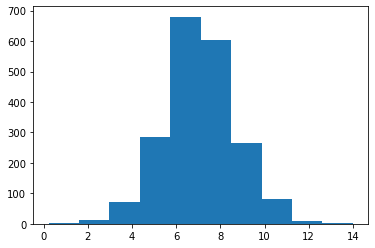

In [25]:
plt.hist(waternonan.ph)

(array([  8.,  26., 124., 295., 547., 535., 335., 107.,  27.,   7.]),
 array([  8.57701293,  20.11931164,  31.66161035,  43.20390905,
         54.74620776,  66.28850647,  77.83080517,  89.37310388,
        100.91540259, 112.45770129, 124.        ]),
 <BarContainer object of 10 artists>)

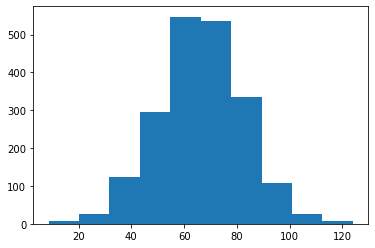

In [26]:
plt.hist(waternonan.Trihalomethanes)


(array([  7.,  32.,  88., 288., 539., 624., 309.,  80.,  41.,   3.]),
 array([ 73.49223369,  97.87682273, 122.26141176, 146.6460008 ,
        171.03058984, 195.41517887, 219.79976791, 244.18435695,
        268.56894598, 292.95353502, 317.33812406]),
 <BarContainer object of 10 artists>)

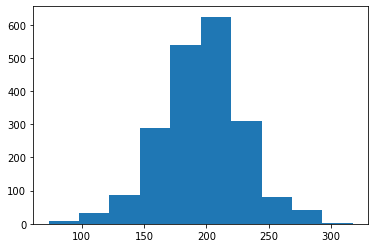

In [27]:
plt.hist(waternonan.Hardness)


(array([ 20., 167., 467., 508., 431., 229., 119.,  51.,  15.,   4.]),
 array([  320.94261127,  5937.71559142, 11554.48857157, 17171.26155171,
        22788.03453186, 28404.80751201, 34021.58049215, 39638.3534723 ,
        45255.12645245, 50871.89943259, 56488.67241274]),
 <BarContainer object of 10 artists>)

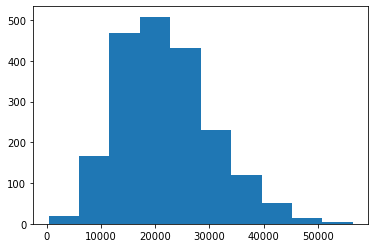

In [28]:
plt.hist(waternonan.Solids)


(array([  7.,  42.,  93., 337., 578., 574., 255.,  98.,  18.,   9.]),
 array([ 1.3908709 ,  2.56448381,  3.73809672,  4.91170963,  6.08532254,
         7.25893545,  8.43254836,  9.60616127, 10.77977418, 11.95338709,
        13.127     ]),
 <BarContainer object of 10 artists>)

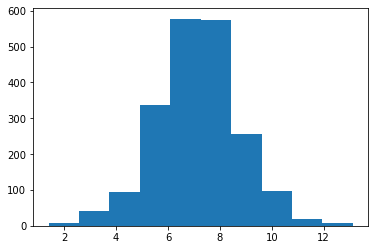

In [29]:
plt.hist(waternonan.Chloramines)


(array([  1.,   5.,  19.,  81., 353., 725., 528., 229.,  61.,   9.]),
 array([129.        , 164.20306423, 199.40612846, 234.60919269,
        269.81225692, 305.01532115, 340.21838538, 375.42144961,
        410.62451384, 445.82757808, 481.03064231]),
 <BarContainer object of 10 artists>)

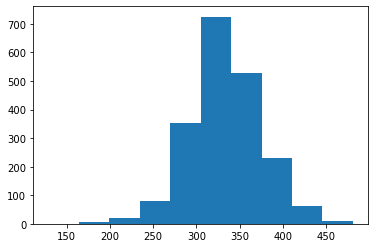

In [30]:
plt.hist(waternonan.Sulfate)


(array([  7., 136., 363., 490., 475., 344., 137.,  49.,   8.,   2.]),
 array([201.61973676, 256.79202504, 311.96431332, 367.1366016 ,
        422.30888988, 477.48117816, 532.65346644, 587.82575472,
        642.998043  , 698.17033128, 753.34261956]),
 <BarContainer object of 10 artists>)

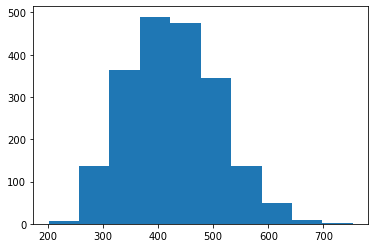

In [31]:
plt.hist(waternonan.Conductivity)


(array([  3.,  27., 125., 348., 564., 505., 331.,  84.,  22.,   2.]),
 array([ 2.2       ,  4.68067066,  7.16134132,  9.64201198, 12.12268264,
        14.60335331, 17.08402397, 19.56469463, 22.04536529, 24.52603595,
        27.00670661]),
 <BarContainer object of 10 artists>)

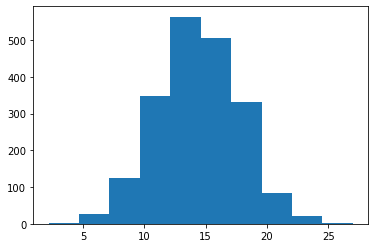

In [32]:
plt.hist(waternonan.Organic_carbon)


(array([  9.,  48., 161., 305., 486., 466., 344., 150.,  32.,  10.]),
 array([1.45      , 1.95447486, 2.45894971, 2.96342457, 3.46789942,
        3.97237428, 4.47684913, 4.98132399, 5.48579884, 5.9902737 ,
        6.49474856]),
 <BarContainer object of 10 artists>)

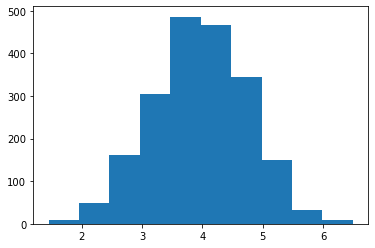

In [33]:
plt.hist(waternonan.Turbidity)


(array([1200.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         811.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

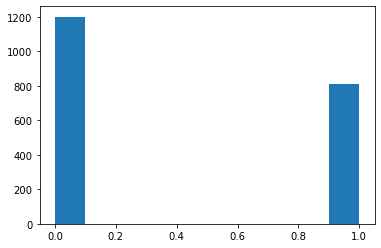

In [34]:
plt.hist(waternonan.Potability)

In [35]:
#corellation heat map
import seaborn as sns

<AxesSubplot:>

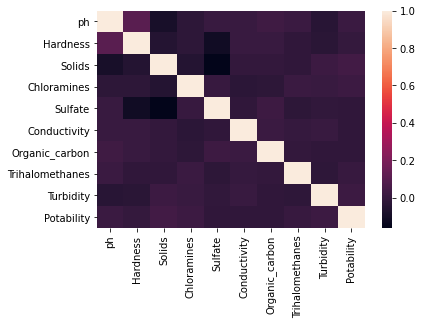

In [38]:
sns.heatmap(waternonan.corr())
#Upshot: not many extraneous variables

In [42]:
#Creating test-train split in data
import random as rand


In [69]:
# 80-20 split trainign data
seed = rand.Random(7)
index_list = seed.sample(range(2010), 1609)
train_set = waternonan.iloc[index_list]
train_set

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
663,8.815358,208.331084,26780.691787,7.223962,329.119685,430.406894,7.151751,88.413296,2.875880,0
1941,9.370697,157.719364,15106.308647,7.762862,316.391974,424.915677,15.645998,108.213981,4.380797,1
308,6.139743,168.444214,23894.136010,9.494582,318.026087,494.129125,19.116022,60.264767,3.841222,0
808,8.969697,195.744765,9049.682595,7.467068,396.453568,378.528511,17.757697,114.208671,3.983099,0
1333,6.865125,216.744458,13529.038758,5.618492,402.313427,553.616733,15.692771,86.378082,3.955154,0
...,...,...,...,...,...,...,...,...,...,...
1815,9.130828,209.743044,11643.663476,6.594682,326.394577,509.661782,11.274065,67.528288,3.074134,0
1840,5.584124,203.756426,29999.987005,7.213329,310.660284,366.558131,14.183025,65.881271,3.852732,0
656,8.922410,207.520726,13291.922609,8.560537,357.944327,468.538326,15.692738,107.282329,4.081728,0
138,8.594677,263.764593,23220.120613,6.394463,383.962592,588.852733,13.579996,86.191635,4.754072,0


In [76]:
# test data
test_data = waternonan.iloc[waternonan.index.difference(index_list)]
test_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
5,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0
9,9.181560,273.813807,24041.326280,6.904990,398.350517,477.974642,13.387341,71.457362,4.503661,0
12,5.400302,140.739062,17266.593422,10.056852,328.358241,472.874073,11.256381,56.931906,4.824786,0
13,6.514415,198.767351,21218.702871,8.670937,323.596349,413.290450,14.900000,79.847843,5.200885,0
14,3.445062,207.926260,33424.768678,8.782147,384.007006,441.785876,13.805902,30.284597,4.184397,0
...,...,...,...,...,...,...,...,...,...,...
1997,8.862113,131.635177,17433.601853,7.639573,340.133165,399.462844,16.712206,53.594104,4.955082,1
1999,7.607224,160.565253,39184.846720,7.826411,312.056066,503.158079,13.366994,62.022308,3.525027,1
2005,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
